# Regression with BDT

We will see how to make a regressor with decision trees and BDTs with a syntethic data set.



### Dataset: linear ###


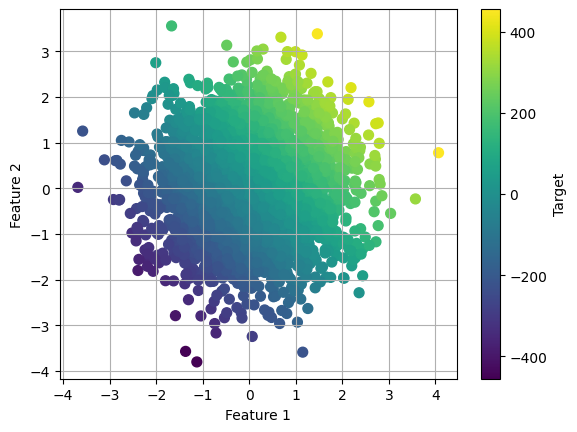


### Dataset: sin_square ###


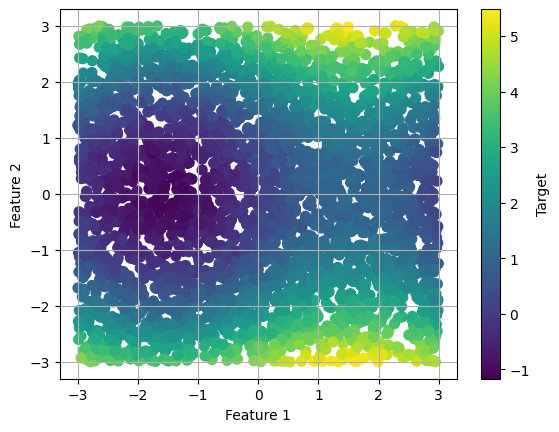


### Dataset: cos_product ###


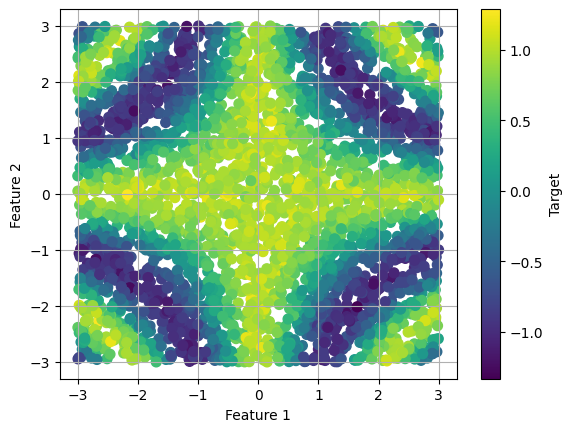

In [ ]:
# generate a synthetic data set
from sklearn.datasets import make_regression

sample_size = 5000

def make_nonlinear_regression_sin_square(n_samples=500, noise_std=0.1, random_state=123):
    rng = np.random.default_rng(random_state)
    X = rng.uniform(-3, 3, size=(n_samples, 2))
    noise = rng.normal(0, noise_std, size=n_samples)
    y = np.sin(X[:, 0]) + 0.5 * X[:, 1]**2 + noise
    return X, y

def make_nonlinear_regression_cos_product(n_samples=500, noise_std=0.1, random_state=234):
    rng = np.random.default_rng(random_state)
    X = rng.uniform(-3, 3, size=(n_samples, 2))
    noise = rng.normal(0, noise_std, size=n_samples)
    y = np.cos(X[:, 0] * X[:, 1]) + noise
    return X, y

datasets = {
    'linear' : make_regression(n_samples=sample_size, n_features=2, n_informative=2, noise=0.2, random_state=123),
    'sin_square' : make_nonlinear_regression_sin_square(sample_size),
    'cos_product' : make_nonlinear_regression_cos_product(sample_size),
}

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

for dataset_name, (X, y) in datasets.items():

  print(f"\n### Dataset: {dataset_name} ###")

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

  # visualize in 2D
  fig, ax = plt.subplots()
  sc = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=50)

  cbar = fig.colorbar(sc, ax=ax, label='Target')
  ax.set_xlabel('Feature 1')
  ax.set_ylabel('Feature 2')
  ax.set_title(dataset_name)
  ax.grid(True)
  plt.show()


First, we train a simple regression tree to see how well it does on the linear and non-linear data sets


### Dataset: linear ###
Test MSE: 1220.1366


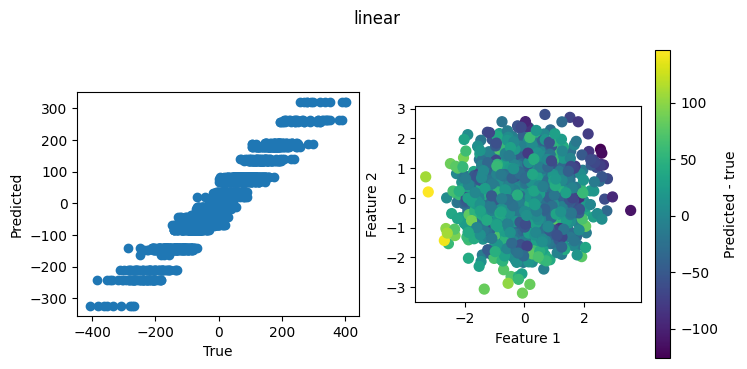


### Dataset: sin_square ###
Test MSE: 0.1502


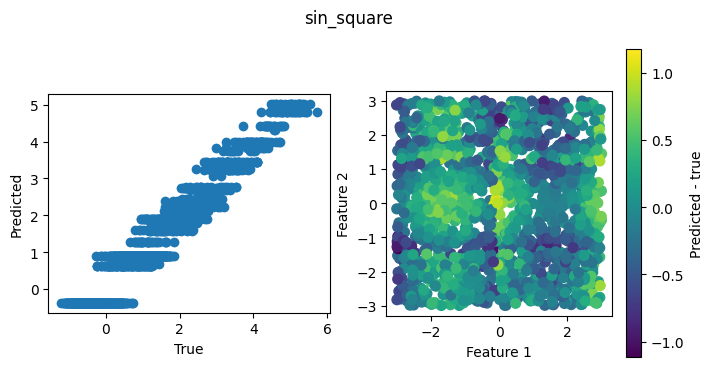


### Dataset: cos_product ###
Test MSE: 0.1778


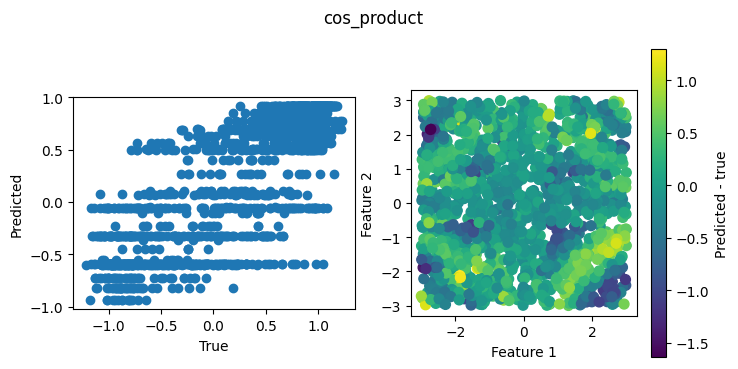

In [ ]:
# Train a decision tree regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

for dataset_name, (X, y) in datasets.items():

  print(f"\n### Dataset: {dataset_name} ###")

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

  reg = DecisionTreeRegressor(max_depth=5, random_state=0)
  reg.fit(X_train, y_train)

  # Predict
  y_pred = reg.predict(X_test)

  # Evaluate
  mse = mean_squared_error(y_test, y_pred)
  print(f"Test MSE: {mse:.4f}")

  fig, axs = plt.subplots(1, 2, figsize=(8, 4))

  axs[0].set_aspect('equal')
  axs[1].set_aspect('equal')

  # on axs[0], plot predicted vs true
  axs[0].scatter(y_test, y_pred)
  axs[0].set_xlabel("True")
  axs[0].set_ylabel("Predicted")

  # on axs[1], plot the residuals in 2D
  sc = axs[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred-y_test, cmap='viridis', s=50)
  cbar = fig.colorbar(sc, ax=axs[1], label='Predicted - true')
  axs[1].set_xlabel('Feature 1')
  axs[1].set_ylabel('Feature 2')
  fig.suptitle(dataset_name)
  ax.grid(True)
  plt.show()


Now let's train a boosted regression tree to see if it can better catch the complexity of the non-linear problems.


### Dataset: linear ###
Test MSE: 46.1255


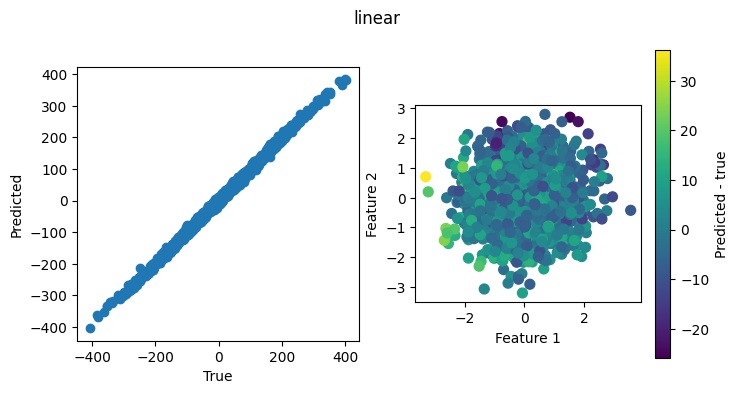


### Dataset: sin_square ###
Test MSE: 0.0143


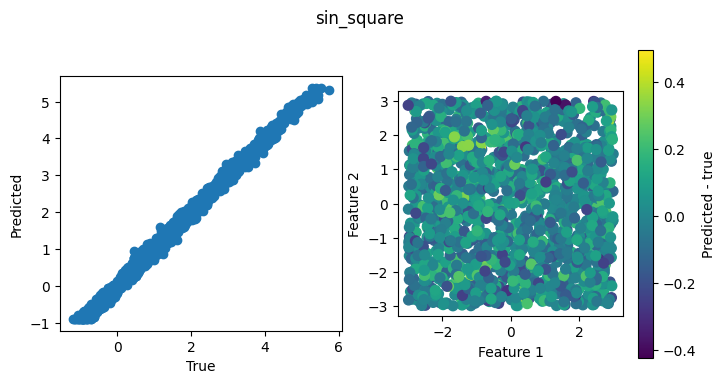


### Dataset: cos_product ###
Test MSE: 0.1125


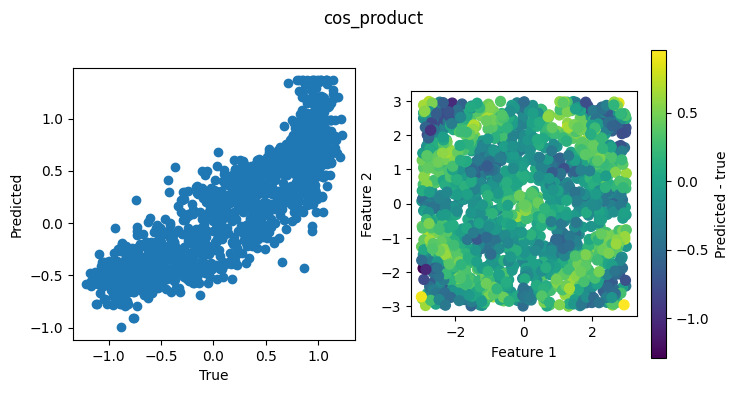

In [ ]:
# Train a boosted decision tree regressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

for dataset_name, (X, y) in datasets.items():

  print(f"\n### Dataset: {dataset_name} ###")

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

  reg = GradientBoostingRegressor(
      n_estimators=100,      # number of boosting stages (trees)
      learning_rate=0.1,     # shrinkage
      max_depth=3,           # depth of individual trees
      random_state=0
  )
  reg.fit(X_train, y_train)

  # Predict
  y_pred = reg.predict(X_test)

  # Evaluate
  mse = mean_squared_error(y_test, y_pred)
  print(f"Test MSE: {mse:.4f}")

  fig, axs = plt.subplots(1, 2, figsize=(8, 4))

  axs[0].set_aspect('equal')
  axs[1].set_aspect('equal')

  # on axs[0], plot predicted vs true
  axs[0].scatter(y_test, y_pred)
  axs[0].set_xlabel("True")
  axs[0].set_ylabel("Predicted")

  # on axs[1], plot the residuals in 2D
  sc = axs[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred-y_test, cmap='viridis', s=50)
  cbar = fig.colorbar(sc, ax=axs[1], label='Predicted - true')
  axs[1].set_xlabel('Feature 1')
  axs[1].set_ylabel('Feature 2')
  fig.suptitle(dataset_name)
  ax.grid(True)
  plt.show()

Much better! Now the same example but with xgboost


### Dataset: linear ###
Test MSE: 53.6664


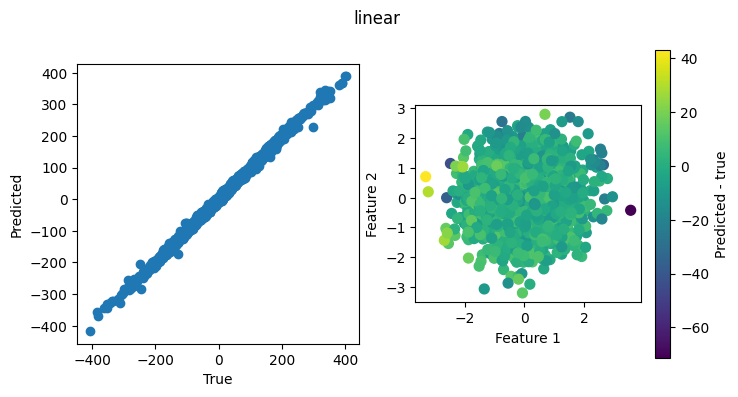


### Dataset: sin_square ###
Test MSE: 0.0140


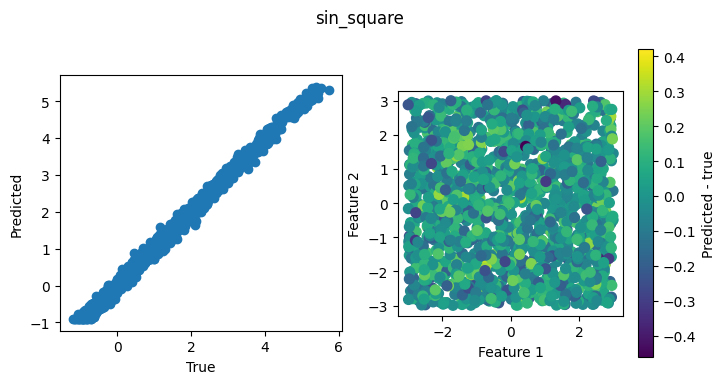


### Dataset: cos_product ###
Test MSE: 0.1152


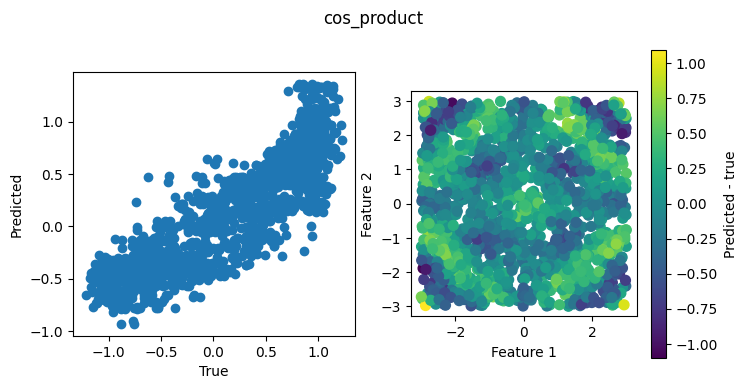

In [ ]:
# Train a boosted decision tree regressor with xgboost

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

for dataset_name, (X, y) in datasets.items():

  print(f"\n### Dataset: {dataset_name} ###")

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

  # Train XGBoost Regressor
  reg = XGBRegressor(
      n_estimators=100,
      learning_rate=0.1,
      max_depth=3,
      objective='reg:squarederror',  # important for regression
      random_state=0
  )
  reg.fit(X_train, y_train)

  # Predict
  y_pred = reg.predict(X_test)

  # Evaluate
  mse = mean_squared_error(y_test, y_pred)
  print(f"Test MSE: {mse:.4f}")

  fig, axs = plt.subplots(1, 2, figsize=(8, 4))

  axs[0].set_aspect('equal')
  axs[1].set_aspect('equal')

  # on axs[0], plot predicted vs true
  axs[0].scatter(y_test, y_pred)
  axs[0].set_xlabel("True")
  axs[0].set_ylabel("Predicted")

  # on axs[1], plot the residuals in 2D
  sc = axs[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred-y_test, cmap='viridis', s=50)
  cbar = fig.colorbar(sc, ax=axs[1], label='Predicted - true')
  axs[1].set_xlabel('Feature 1')
  axs[1].set_ylabel('Feature 2')
  fig.suptitle(dataset_name)
  ax.grid(True)
  plt.show()